In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
dataset202209 = pd.read_csv('origin_destination_train_202209.csv')
dataset202209.head(10)

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2022-09,WEEKDAY,9,TRAIN,EW32,DT24,1
1,2022-09,WEEKENDS/HOLIDAY,6,TRAIN,BP4,EW31,2
2,2022-09,WEEKENDS/HOLIDAY,6,TRAIN,EW31,BP4,1
3,2022-09,WEEKDAY,6,TRAIN,BP4,EW31,45
4,2022-09,WEEKDAY,12,TRAIN,NE15,SW5,30
5,2022-09,WEEKENDS/HOLIDAY,12,TRAIN,SW5,NE15,29
6,2022-09,WEEKENDS/HOLIDAY,12,TRAIN,NE15,SW5,16
7,2022-09,WEEKDAY,12,TRAIN,SW5,NE15,47
8,2022-09,WEEKDAY,19,TRAIN,SW8,DT23,2
9,2022-09,WEEKENDS/HOLIDAY,9,TRAIN,PE5,DT7,1


In [3]:
dataset202210 = pd.read_csv('origin_destination_train_202210.csv')
dataset202210.head(10)

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2022-10,WEEKENDS/HOLIDAY,9,TRAIN,EW32,DT24,1
1,2022-10,WEEKDAY,6,TRAIN,BP4,EW31,36
2,2022-10,WEEKDAY,12,TRAIN,NE15,SW5,42
3,2022-10,WEEKENDS/HOLIDAY,12,TRAIN,NE15,SW5,34
4,2022-10,WEEKDAY,12,TRAIN,SW5,NE15,43
5,2022-10,WEEKENDS/HOLIDAY,12,TRAIN,SW5,NE15,46
6,2022-10,WEEKDAY,19,TRAIN,DT23,SW8,1
7,2022-10,WEEKENDS/HOLIDAY,9,TRAIN,PE5,DT7,1
8,2022-10,WEEKDAY,9,TRAIN,PE5,DT7,3
9,2022-10,WEEKDAY,9,TRAIN,DT7,PE5,3


In [4]:
dataset = pd.concat([dataset202209, dataset202210])
dataset.tail()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
701027,2022-10,WEEKENDS/HOLIDAY,7,TRAIN,EW13/NS25,EW15,16
701028,2022-10,WEEKDAY,7,TRAIN,EW13/NS25,EW15,177
701029,2022-10,WEEKENDS/HOLIDAY,21,TRAIN,EW32,DT27,1
701030,2022-10,WEEKDAY,21,TRAIN,DT27,EW32,2
701031,2022-10,WEEKENDS/HOLIDAY,21,TRAIN,DT27,EW32,3


In [5]:
stn_codes = pd.read_csv('Train Station Codes and Chinese Names.csv')
stn_codes.head(10)

,stn_code,mrt_station_english,mrt_station_chinese,mrt_line_english,mrt_line_chinese,Unnamed: 5
0,NS1,Jurong East,裕廊东,North-South Line,南北线,NaN
1,NS2,Bukit Batok,武吉巴督,North-South Line,南北线,NaN
2,NS3,Bukit Gombak,武吉甘柏,North-South Line,南北线,NaN
3,NS4,Choa Chu Kang,蔡厝港,North-South Line,南北线,NaN
4,NS5,Yew Tee,油池,North-South Line,南北线,NaN
5,NS7,Kranji,克兰芝,North-South Line,南北线,NaN
6,NS8,Marsiling,马西岭,North-South Line,南北线,NaN
7,NS9,Woodlands,兀兰,North-South Line,南北线,NaN
8,NS10,Admiralty,海军部,North-South Line,南北线,NaN
9,NS11,Sembawang,三巴旺,North-South Line,南北线,NaN


In [6]:
stations = sorted(dataset['DESTINATION_PT_CODE'].unique())
print(stations)

['BP10', 'BP11', 'BP12', 'BP13', 'BP2', 'BP3', 'BP4', 'BP5', 'BP6/DT1', 'BP7', 'BP8', 'BP9', 'CC10/DT26', 'CC11', 'CC12', 'CC14', 'CC16', 'CC17/TE9', 'CC19/DT9', 'CC2', 'CC20', 'CC21', 'CC22/EW21', 'CC23', 'CC24', 'CC25', 'CC26', 'CC27', 'CC28', 'CC3', 'CC4/DT15', 'CC5', 'CC6', 'CC7', 'CC8', 'CE1/DT16', 'CG1/DT35', 'CG2', 'DT10', 'DT13', 'DT17', 'DT18', 'DT2', 'DT20', 'DT21', 'DT22', 'DT23', 'DT24', 'DT25', 'DT27', 'DT28', 'DT29', 'DT3', 'DT30', 'DT31', 'DT33', 'DT34', 'DT5', 'DT6', 'DT7', 'DT8', 'EW1', 'EW10', 'EW11', 'EW12/DT14', 'EW13/NS25', 'EW14/NS26', 'EW15', 'EW16/NE3', 'EW17', 'EW18', 'EW19', 'EW2/DT32', 'EW20', 'EW22', 'EW23', 'EW24/NS1', 'EW25', 'EW26', 'EW27', 'EW28', 'EW29', 'EW3', 'EW30', 'EW31', 'EW32', 'EW33', 'EW4', 'EW5', 'EW6', 'EW7', 'EW8/CC9', 'EW9', 'NE1/CC29', 'NE10', 'NE11', 'NE12/CC13', 'NE13', 'NE14', 'NE15', 'NE16/STC', 'NE17/PTC', 'NE4/DT19', 'NE5', 'NE7/DT12', 'NE8', 'NE9', 'NS10', 'NS11', 'NS12', 'NS13', 'NS14', 'NS15', 'NS16', 'NS17/CC15', 'NS18', 'NS19', 

## Filtering for relevant trips
1. Filter for starting / ending stations on the respective line, TEL / NSL

2. Exclude trips starting / ending at interchange where there is a direct route between the 2 stations, line of interest not used, e.g. DT6 to DT10/TE11

To Remove From TEL (POST TEL3)
- NS9/TE2 Woodlands         : All NS stations (except Orchard and Marina Bay)
- CC17/TE9 Caldecott        : All CC stations (except Dhoby Ghaut - Promenade, Harbourfront)
- DT10/TE11 Stevens         : All DT stations
- NS22/TE14 Orchard         : All NS stations (except Woodlands)
- EW16/NE3/TE17 Outram Park : All EW, CG, NE stations
- NS27/CE2/TE20 Marina Bay  : All NS, CC, CE stations (except Woodlands, Marymount, Caldecott, Haw Par Villa - Harbourfront)


To Remove from NSL (POST TEL3)
- EW24/NS1 Jurong East     : All EW, CG stations
- NS4/BP1 Chua Chu Kang    : All BP stations
- NS9/TE2 Woodlands        : All TE stations
- NS17/CC15 Bishan         : All CC stations except Dhoby Ghaut - Esplanade
- NS21/DT11 Newton         : All DT stations
- NS22/TE14 Orchard        : All TE stations 
- NS24/NE6/CC1 Dhoby Ghaut : All CC, NE stations except Bishan - Caldecott
- EW13/NS25 City Hall      : All EW, CG stations
- EW14/NS26 Raffles Place  : All EW, CG stations
- NS27/CE2/TE20 Marina Bay : All (TE), CE, CC stations except Bishan

#### Limitations

++ : Undercount,  -- : Overcount

++ Users who use TEL/NSL but as the middle line(s) during a journey of >= 3 lines


In [7]:
# filter dataset by station
telusage = dataset[dataset['DESTINATION_PT_CODE'].str.contains("TE") | dataset['ORIGIN_PT_CODE'].str.contains("TE")]
telusage.head(10)

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
10,2022-09,WEEKDAY,15,TRAIN,CC27,TE5,9
11,2022-09,WEEKENDS/HOLIDAY,15,TRAIN,TE5,CC27,1
82,2022-09,WEEKDAY,13,TRAIN,TE7,SE3,1
151,2022-09,WEEKDAY,7,TRAIN,TE5,DT7,20
152,2022-09,WEEKENDS/HOLIDAY,7,TRAIN,TE5,DT7,1
221,2022-09,WEEKDAY,6,TRAIN,TE5,TE7,220
222,2022-09,WEEKDAY,6,TRAIN,TE7,TE5,102
223,2022-09,WEEKENDS/HOLIDAY,6,TRAIN,TE5,TE7,2
224,2022-09,WEEKENDS/HOLIDAY,6,TRAIN,TE7,TE5,13
244,2022-09,WEEKDAY,6,TRAIN,NS9/TE2,EW26,1005


In [8]:
def remove_trips_from_TEL(origin, dest):
    if origin.find("NS9") >= 0 and dest.find("NS") >= 0:
        return 0
    elif origin.find("CC17") >= 0 and dest.find("CC") >= 0:
        return 0
    elif origin.find("DT10") >= 0 and dest.find("DT") >= 0:
        return 0
    elif origin.find("NS22") >= 0 and dest.find("NS") >= 0:
        return 0
    elif origin.find("EW16") >= 0 and (dest.find("EW") >= 0 or dest.find("CG") >= 0 or dest.find("NE") >= 0):
        return 0
    elif origin.find("NS27") >= 0 and (dest.find("NS") >= 0 or dest.find("CC") >= 0 or dest.find("CE") >= 0):
        return 0
    elif dest.find("NS9") >= 0 and origin.find("NS") >= 0:
        return 0
    elif dest.find("CC17") >= 0 and origin.find("CC") >= 0:
        return 0
    elif dest.find("DT10") >= 0 and origin.find("DT") >= 0:
        return 0
    elif dest.find("NS22") >= 0 and origin.find("NS") >= 0:
        return 0
    elif dest.find("EW16") >= 0 and (origin.find("EW") >= 0 or origin.find("CG") >= 0 or origin.find("NE") >= 0):
        return 0
    elif dest.find("NS27") >= 0 and (origin.find("NS") >= 0 or origin.find("CC") >= 0 or origin.find("CE") >= 0):
        return 0
    else:
        return 1

In [9]:
telusage['remove'] = telusage.apply(lambda x: remove_trips_from_TEL(x['ORIGIN_PT_CODE'], x['DESTINATION_PT_CODE']), axis=1)

C:\Users\Bryan\AppData\Local\Temp/ipykernel_17568/3014200979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telusage['remove'] = telusage.apply(lambda x: remove_trips_from_TEL(x['ORIGIN_PT_CODE'], x['DESTINATION_PT_CODE']), axis=1)


In [10]:
# Sanity Check
telusage_removed = telusage[telusage['remove'] == 0]
telusage_removed.head(10)

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS,remove
381,2022-09,WEEKDAY,21,TRAIN,NS27/CE2,NS9/TE2,82,0
382,2022-09,WEEKENDS/HOLIDAY,21,TRAIN,NS27/CE2,NS9/TE2,26,0
383,2022-09,WEEKDAY,21,TRAIN,NS9/TE2,NS27/CE2,13,0
384,2022-09,WEEKENDS/HOLIDAY,21,TRAIN,NS9/TE2,NS27/CE2,10,0
509,2022-09,WEEKDAY,5,TRAIN,CC17/TE9,NS17/CC15,4,0
510,2022-09,WEEKENDS/HOLIDAY,5,TRAIN,CC17/TE9,NS17/CC15,10,0
2210,2022-09,WEEKDAY,15,TRAIN,NS19,NS9/TE2,765,0
2211,2022-09,WEEKENDS/HOLIDAY,15,TRAIN,NS9/TE2,NS19,247,0
2212,2022-09,WEEKDAY,15,TRAIN,NS9/TE2,NS19,493,0
2213,2022-09,WEEKENDS/HOLIDAY,15,TRAIN,NS19,NS9/TE2,304,0


In [11]:
telusage = telusage[telusage['remove'] == 1]
telusage.drop(['remove'], axis = 1, inplace=True)
telusage_group = telusage.groupby(['YEAR_MONTH', 'DAY_TYPE', 'TIME_PER_HOUR']).sum()
telusage_group = telusage_group.reset_index(['YEAR_MONTH', 'DAY_TYPE', 'TIME_PER_HOUR'])
telusage_group

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,TOTAL_TRIPS
0,2022-09,WEEKDAY,0,68
1,2022-09,WEEKDAY,5,19105
2,2022-09,WEEKDAY,6,94970
3,2022-09,WEEKDAY,7,146186
4,2022-09,WEEKDAY,8,96734
...,...,...,...,...
75,2022-10,WEEKENDS/HOLIDAY,19,26121
76,2022-10,WEEKENDS/HOLIDAY,20,21254
77,2022-10,WEEKENDS/HOLIDAY,21,19904
78,2022-10,WEEKENDS/HOLIDAY,22,14337


In [12]:
def get_daily_trips(month, daytype, trips):
    if month == '2022-09':
        if daytype == 'WEEKDAY':
            return trips/22
        else:
            return trips/8
    
    elif month == '2022-10':
        if daytype == 'WEEKDAY':
            return trips/20
        else:
            return trips/11

In [13]:
telusage_group['TIME_PER_HOUR'] = telusage_group['TIME_PER_HOUR'].replace([0], [24])
telusage_group['DAILY_TOTAL_TRIPS'] = telusage_group.apply(lambda x: get_daily_trips(x['YEAR_MONTH'],
                                                                                     x['DAY_TYPE'], 
                                                                                     x['TOTAL_TRIPS']
                                                                                     ),
                                                           axis = 1)

telusage_group.head(60)

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,TOTAL_TRIPS,DAILY_TOTAL_TRIPS
0,2022-09,WEEKDAY,24,68,3.090909
1,2022-09,WEEKDAY,5,19105,868.409091
2,2022-09,WEEKDAY,6,94970,4316.818182
3,2022-09,WEEKDAY,7,146186,6644.818182
4,2022-09,WEEKDAY,8,96734,4397.000000
5,2022-09,WEEKDAY,9,50055,2275.227273
6,2022-09,WEEKDAY,10,39455,1793.409091
7,2022-09,WEEKDAY,11,39206,1782.090909
8,2022-09,WEEKDAY,12,48105,2186.590909
9,2022-09,WEEKDAY,13,53596,2436.181818


<AxesSubplot:xlabel='TIME_PER_HOUR', ylabel='DAILY_TOTAL_TRIPS'>

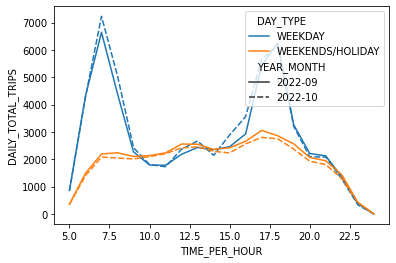

In [14]:
%matplotlib inline
sns.lineplot(data = telusage_group, x = 'TIME_PER_HOUR', y = 'DAILY_TOTAL_TRIPS', hue = 'DAY_TYPE', style = 'YEAR_MONTH')

In [15]:
nslusage = dataset[dataset['DESTINATION_PT_CODE'].str.contains("NS") | dataset['ORIGIN_PT_CODE'].str.contains("NS")]
nslusage.head(10)

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
12,2022-09,WEEKENDS/HOLIDAY,14,TRAIN,NS3,NE10,5
13,2022-09,WEEKDAY,14,TRAIN,NS3,NE10,2
14,2022-09,WEEKENDS/HOLIDAY,14,TRAIN,NE10,NS3,3
15,2022-09,WEEKDAY,14,TRAIN,NE10,NS3,3
50,2022-09,WEEKENDS/HOLIDAY,20,TRAIN,NS24/NE6/CC1,CC16,13
51,2022-09,WEEKDAY,20,TRAIN,CC16,NS24/NE6/CC1,7
52,2022-09,WEEKENDS/HOLIDAY,20,TRAIN,CC16,NS24/NE6/CC1,3
53,2022-09,WEEKDAY,20,TRAIN,NS24/NE6/CC1,CC16,40
54,2022-09,WEEKENDS/HOLIDAY,23,TRAIN,EW18,EW13/NS25,2
55,2022-09,WEEKDAY,23,TRAIN,EW13/NS25,EW18,295


In [16]:
def remove_trips_from_NSL(origin, dest):
    if origin.find("EW24") >= 0 and (dest.find("EW") >= 0 or dest.find("CG") >= 0):
        return 0
    elif origin.find("BP1") >= 0 and dest.find("BP") >= 0:
        return 0
    elif origin.find("TE2") >= 0 and dest.find("TE") >= 0:
        return 0
    elif origin.find("TE14") >= 0 and dest.find("TE") >= 0:
        return 0
    elif origin.find("EW13") >= 0 and (dest.find("EW") >= 0 or dest.find("CG") >= 0):
        return 0
    elif origin.find("EW14") >= 0 and (dest.find("EW") >= 0 or dest.find("CG") >= 0):
        return 0
    
    elif origin.find("CC15") >= 0 and dest.find("CC") >= 0:
        # exceptions for Bishan station
        if dest.find("CC1") >= 0 or dest.find("CC2") >= 0 or dest.find("CC3") >= 0:
            return 1
        else:
            return 0
    
    elif origin.find("NS24") >= 0 and (dest.find("CC") >= 0 or dest.find("NE") >= 0):
        # exception for Dhoby Ghaut Station
        if dest.find("CC15") >= 0 or dest.find("CC16") >= 0 or dest.find("CC17") >= 0:
            return 1
        else:
            return 0
    
    elif origin.find("NS27") >= 0 and (dest.find("CC") >= 0 or dest.find("CE") >= 0):
        # exception for Marina Bay Station
        if dest.find("CC15") >= 0:
            return 1
        else:
            return 0
    
    elif dest.find("EW24") >= 0 and (origin.find("EW") >= 0 or origin.find("CG") >= 0):
        return 0
    elif dest.find("BP1") >= 0 and origin.find("BP") >= 0:
        return 0
    elif dest.find("TE2") >= 0 and origin.find("TE") >= 0:
        return 0
    elif dest.find("TE14") >= 0 and origin.find("TE") >= 0:
        return 0
    elif dest.find("EW13") >= 0 and (origin.find("EW") >= 0 or origin.find("CG") >= 0):
        return 0
    elif dest.find("EW14") >= 0 and (origin.find("EW") >= 0 or origin.find("CG") >= 0):
        return 0
    
    elif dest.find("CC15") >= 0 and origin.find("CC") >= 0:
        # exceptions for Bishan station
        if origin.find("CC1") >= 0 or origin.find("CC2") >= 0 or origin.find("CC3") >= 0:
            return 1
        else:
            return 0
    
    elif dest.find("NS24") >= 0 and (origin.find("CC") >= 0 or origin.find("NE") >= 0):
        # exception for Dhoby Ghaut Station
        if origin.find("CC15") >= 0 or origin.find("CC16") >= 0 or origin.find("CC17") >= 0:
            return 1
        else:
            return 0
    
    elif dest.find("NS27") >= 0 and (origin.find("CC") >= 0 or origin.find("CE") >= 0):
        # exception for Marina Bay Station
        if origin.find("CC15") >= 0:
            return 1
        else:
            return 0
    
    else:
        return 1

In [17]:
nslusage['remove'] = nslusage.apply(lambda x: remove_trips_from_NSL(x['ORIGIN_PT_CODE'], x['DESTINATION_PT_CODE']), axis=1)

C:\Users\Bryan\AppData\Local\Temp/ipykernel_17568/2760026618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nslusage['remove'] = nslusage.apply(lambda x: remove_trips_from_NSL(x['ORIGIN_PT_CODE'], x['DESTINATION_PT_CODE']), axis=1)


In [18]:
# Sanity Check
nslusage_removed = nslusage[nslusage['remove'] == 0]
nslusage_removed.head(10)

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS,remove
54,2022-09,WEEKENDS/HOLIDAY,23,TRAIN,EW18,EW13/NS25,2,0
55,2022-09,WEEKDAY,23,TRAIN,EW13/NS25,EW18,295,0
56,2022-09,WEEKENDS/HOLIDAY,23,TRAIN,EW13/NS25,EW18,88,0
57,2022-09,WEEKDAY,23,TRAIN,EW18,EW13/NS25,8,0
357,2022-09,WEEKENDS/HOLIDAY,11,TRAIN,EW24/NS1,EW10,97,0
358,2022-09,WEEKDAY,11,TRAIN,EW10,EW24/NS1,145,0
359,2022-09,WEEKDAY,11,TRAIN,EW24/NS1,EW10,106,0
360,2022-09,WEEKENDS/HOLIDAY,11,TRAIN,EW10,EW24/NS1,73,0
655,2022-09,WEEKDAY,6,TRAIN,EW16/NE3,EW14/NS26,199,0
656,2022-09,WEEKENDS/HOLIDAY,6,TRAIN,EW14/NS26,EW16/NE3,4,0


In [19]:
nslusage = nslusage[nslusage['remove'] == 1]
nslusage.drop(['remove'], axis = 1, inplace=True)
nslusage_group = nslusage.groupby(['YEAR_MONTH','DAY_TYPE', 'TIME_PER_HOUR']).sum()
nslusage_group = nslusage_group.reset_index(['YEAR_MONTH', 'DAY_TYPE', 'TIME_PER_HOUR'])
nslusage_group.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,TOTAL_TRIPS
0,2022-09,WEEKDAY,0,15551
1,2022-09,WEEKDAY,5,257560
2,2022-09,WEEKDAY,6,963739
3,2022-09,WEEKDAY,7,1585031
4,2022-09,WEEKDAY,8,1242371


In [20]:
nslusage_group['TIME_PER_HOUR'] = nslusage_group['TIME_PER_HOUR'].replace([0], [24])
nslusage_group['DAILY_TOTAL_TRIPS'] = nslusage_group.apply(lambda x: get_daily_trips(x['YEAR_MONTH'],
                                                                                     x['DAY_TYPE'], 
                                                                                     x['TOTAL_TRIPS']
                                                                                     ),
                                                           axis = 1)

nslusage_group.head(60)

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,TOTAL_TRIPS,DAILY_TOTAL_TRIPS
0,2022-09,WEEKDAY,24,15551,706.863636
1,2022-09,WEEKDAY,5,257560,11707.272727
2,2022-09,WEEKDAY,6,963739,43806.318182
3,2022-09,WEEKDAY,7,1585031,72046.863636
4,2022-09,WEEKDAY,8,1242371,56471.409091
5,2022-09,WEEKDAY,9,741412,33700.545455
6,2022-09,WEEKDAY,10,615616,27982.545455
7,2022-09,WEEKDAY,11,622970,28316.818182
8,2022-09,WEEKDAY,12,670964,30498.363636
9,2022-09,WEEKDAY,13,697745,31715.681818


<AxesSubplot:xlabel='TIME_PER_HOUR', ylabel='DAILY_TOTAL_TRIPS'>

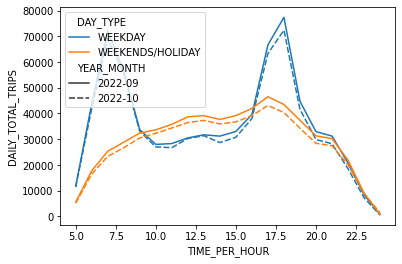

In [21]:
sns.lineplot(data = nslusage_group, x = 'TIME_PER_HOUR', y = 'DAILY_TOTAL_TRIPS', hue = 'DAY_TYPE', style = 'YEAR_MONTH')

### Insights
From the above, we can see that mean daily ridership for October is slightly less than September

November data would have mixed data since TEL only opened for revenue service on 13 Nov
As such, it is not used, Dec data is used instead for comparison.



In [22]:
datasetp = pd.read_csv('origin_destination_train_202212.csv')
datasetp.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2022-12,WEEKDAY,9,TRAIN,EW32,DT24,1
1,2022-12,WEEKENDS/HOLIDAY,11,TRAIN,NS14,DT15,48
2,2022-12,WEEKDAY,11,TRAIN,NS14,DT15,77
3,2022-12,WEEKENDS/HOLIDAY,11,TRAIN,DT15,NS14,7
4,2022-12,WEEKDAY,11,TRAIN,DT15,NS14,4


In [23]:
stations_p = sorted(datasetp['DESTINATION_PT_CODE'].unique())
print(stations_p)

['BP1', 'BP10', 'BP11', 'BP12', 'BP13', 'BP2', 'BP3', 'BP4', 'BP5', 'BP6', 'BP7', 'BP8', 'BP9', 'CC1', 'CC10', 'CC10/DT26', 'CC11', 'CC12', 'CC13', 'CC14', 'CC15', 'CC16', 'CC17', 'CC17/TE9', 'CC19', 'CC19/DT9', 'CC2', 'CC20', 'CC21', 'CC22', 'CC23', 'CC24', 'CC25', 'CC26', 'CC27', 'CC28', 'CC29', 'CC3', 'CC4', 'CC4/DT15', 'CC5', 'CC6', 'CC7', 'CC8', 'CC9', 'CE1', 'CE1/DT16', 'CE2', 'CG1', 'CG1/DT35', 'CG2', 'DT1', 'DT10', 'DT11', 'DT12', 'DT13', 'DT14', 'DT15', 'DT16', 'DT17', 'DT18', 'DT19', 'DT2', 'DT20', 'DT21', 'DT22', 'DT23', 'DT24', 'DT25', 'DT26', 'DT27', 'DT28', 'DT29', 'DT3', 'DT30', 'DT31', 'DT32', 'DT33', 'DT34', 'DT35', 'DT5', 'DT6', 'DT7', 'DT8', 'DT9', 'EW1', 'EW10', 'EW11', 'EW12', 'EW12/DT14', 'EW13', 'EW14', 'EW14/NS26', 'EW15', 'EW16', 'EW16/NE3/TE1', 'EW17', 'EW18', 'EW19', 'EW2', 'EW2/DT32', 'EW20', 'EW21', 'EW21/CC22', 'EW22', 'EW23', 'EW24', 'EW24/NS1', 'EW25', 'EW26', 'EW27', 'EW28', 'EW29', 'EW3', 'EW30', 'EW31', 'EW32', 'EW33', 'EW4', 'EW5', 'EW6', 'EW7', 'EW8

### Treatment for Dec Data
Looking at the unique station codes, interchange stations are double counted in the numbers provided in data.
- Telltale sign: Summation of trip datas in December was almost double that of October
- In comparison to SBS Transit figures for DTL, NEL and LRTs, the figure should be relatively constant
https://www.sbstransit.com.sg/ridership

Upon closer inspection, Bishan to Bayfront is more than double entry as there is more than 1 combination of entering this entry

For eg, DayType = Weekdays, Time = 7 
1. NS17/CC15 to CE1
2. NS17/CC15 to CE1/DT16
3. NS17 to CE1/DT16
4. NS17 to CE1


All of the above recorded 39 trips. To account for this issue, all data points for interchange stations will be filtered away using '/'. This means only non interchange station codes should be included.

In [24]:
def remove_interchanges(origin, dest):
    if origin.find("/") >= 0 or dest.find("/") >= 0:
        return 0
    else:
        return 1

In [25]:
datasetp['remove'] = datasetp.apply(lambda x: remove_interchanges(x['ORIGIN_PT_CODE'], x['DESTINATION_PT_CODE']), axis=1)
datasetp = datasetp[datasetp['remove'] == 1]
datasetp = datasetp.drop(['remove'], axis = 1)
datasetp

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2022-12,WEEKDAY,9,TRAIN,EW32,DT24,1
1,2022-12,WEEKENDS/HOLIDAY,11,TRAIN,NS14,DT15,48
2,2022-12,WEEKDAY,11,TRAIN,NS14,DT15,77
3,2022-12,WEEKENDS/HOLIDAY,11,TRAIN,DT15,NS14,7
4,2022-12,WEEKDAY,11,TRAIN,DT15,NS14,4
...,...,...,...,...,...,...,...
1373257,2022-12,WEEKENDS/HOLIDAY,7,TRAIN,NE9,EW25,5
1373258,2022-12,WEEKDAY,7,TRAIN,EW25,NE9,110
1373259,2022-12,WEEKDAY,6,TRAIN,SE4,TE13,1
1373263,2022-12,WEEKDAY,22,TRAIN,DT2,PW5,1


In [26]:
telusagep = datasetp[datasetp['DESTINATION_PT_CODE'].str.contains("TE") | datasetp['ORIGIN_PT_CODE'].str.contains("TE")]
telusagep.head(10)

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
25,2022-12,WEEKDAY,6,TRAIN,TE8,EW14,27
31,2022-12,WEEKENDS/HOLIDAY,15,TRAIN,CC27,TE5,1
32,2022-12,WEEKENDS/HOLIDAY,15,TRAIN,TE5,CC27,1
33,2022-12,WEEKDAY,15,TRAIN,CC27,TE5,5
34,2022-12,WEEKDAY,15,TRAIN,TE5,CC27,2
51,2022-12,WEEKDAY,17,TRAIN,TE4,BP6,2
106,2022-12,WEEKENDS/HOLIDAY,0,TRAIN,TE19,EW2,1
107,2022-12,WEEKENDS/HOLIDAY,8,TRAIN,TE4,DT11,2
108,2022-12,WEEKDAY,8,TRAIN,DT11,TE4,2
109,2022-12,WEEKDAY,8,TRAIN,TE4,DT11,28


In [27]:
def remove_trips_from_TEL_post(origin, dest):
    if origin.find("TE") >= 0 and origin.find("/") >= 0:
        return 0   
    
    elif origin.find("NS9") >= 0 and dest.find("NS") >= 0:
        # exception for Woodlands Station
        if dest.find("NS22") >= 0 or dest.find("NS27") >= 0:
            return 1
        else:
            return 0
    elif origin.find("CC17") >= 0 and dest.find("CC") >= 0:
        # exception for Caldecott Station
        if dest.find("CC1") >= 0 or dest.find("CC2") >= 0 or dest.find("CC3") >= 0 or dest.find("CC4") >= 0 or dest.find("CC29") >= 0:
            return 1
        else:
            return 0

    elif origin.find("DT10") >= 0 and dest.find("DT") >= 0:
        return 0
    
    elif origin.find("NS22") >= 0 and dest.find("NS") >= 0:
        # exception for Orchard Station
        if dest.find("NS9") >= 0 or dest.find("NS27") >= 0:
            return 1
        else:
            return 0    
    
    elif origin.find("EW16") >= 0 and (dest.find("EW") >= 0 or dest.find("CG") >= 0 or dest.find("NE") >= 0):
        return 0
    elif origin.find("NS27") >= 0 and (dest.find("NS") >= 0 or dest.find("CC") >= 0 or dest.find("CE") >= 0):
        # exception for Marina Bay Station
        if dest.find("NS9") >= 0 or dest.find("NS22") >= 0 or dest.find("CC16") >= 0 or dest.find("CC17") >= 0 or dest.find("CC25") >= 0 or dest.find("CC26") >= 0 or dest.find("CC27") >= 0 or dest.find("CC28") >= 0 or dest.find("CC29") >= 0:
            return 1
        else:
            return 0
    
    elif dest.find("TE") >= 0 and dest.find("/") >= 0:
        return 0  
        
    elif dest.find("NS9") >= 0 and origin.find("NS") >= 0:
        # exception for Woodlands Station
        if origin.find("NS22") >= 0 or origin.find("NS27") >= 0:
            return 1
        else:
            return 0
    elif dest.find("CC17") >= 0 and origin.find("CC") >= 0:
        # exception for Caldecott Station
        if origin.find("CC1") >= 0 or origin.find("CC2") >= 0 or origin.find("CC3") >= 0 or origin.find("CC4") >= 0 or origin.find("CC29") >= 0:
            return 1
        else:
            return 0

    elif dest.find("DT10") >= 0 and origin.find("DT") >= 0:
        return 0
    
    elif dest.find("NS22") >= 0 and origin.find("NS") >= 0:
        # exception for Orchard Station
        if origin.find("NS9") >= 0 or origin.find("NS27") >= 0:
            return 1
        else:
            return 0    
    
    elif dest.find("EW16") >= 0 and (origin.find("EW") >= 0 or origin.find("CG") >= 0 or origin.find("NE") >= 0):
        return 0
    elif dest.find("NS27") >= 0 and (origin.find("NS") >= 0 or origin.find("CC") >= 0 or origin.find("CE") >= 0):
        # exception for Marina Bay Station
        if origin.find("NS9") >= 0 or origin.find("NS22") >= 0 or origin.find("CC16") >= 0 or origin.find("CC17") >= 0 or origin.find("CC25") >= 0 or origin.find("CC26") >= 0 or origin.find("CC27") >= 0 or origin.find("CC28") >= 0 or origin.find("CC29") >= 0:
            return 1
        else:
            return 0
    else:
        return 1

In [28]:
telusagep['remove'] = telusagep.apply(lambda x: remove_trips_from_TEL_post(x['ORIGIN_PT_CODE'], x['DESTINATION_PT_CODE']), axis=1)

C:\Users\Bryan\AppData\Local\Temp/ipykernel_17568/322263844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telusagep['remove'] = telusagep.apply(lambda x: remove_trips_from_TEL_post(x['ORIGIN_PT_CODE'], x['DESTINATION_PT_CODE']), axis=1)


In [29]:
telusagep = telusagep[telusagep['remove'] == 1]
telusagep.drop(['remove'], axis = 1, inplace=True)
telusagep_group = telusagep.groupby(['YEAR_MONTH', 'DAY_TYPE', 'TIME_PER_HOUR']).sum()
telusagep_group = telusagep_group.reset_index(['YEAR_MONTH', 'DAY_TYPE', 'TIME_PER_HOUR'])
telusagep_group

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,TOTAL_TRIPS
0,2022-12,WEEKDAY,0,594
1,2022-12,WEEKDAY,5,15370
2,2022-12,WEEKDAY,6,66400
3,2022-12,WEEKDAY,7,151955
4,2022-12,WEEKDAY,8,141913
5,2022-12,WEEKDAY,9,87102
6,2022-12,WEEKDAY,10,84318
7,2022-12,WEEKDAY,11,90610
8,2022-12,WEEKDAY,12,98062
9,2022-12,WEEKDAY,13,96910


In [30]:
# oct_mean_ridershiptel = telusage_group.iloc[40:]
# oct_mean_ridershiptel = oct_mean_ridershiptel['DAILY_TOTAL_TRIPS'].tolist()
# oct_mean_ridershiptel

In [31]:
# def sub_oct_trips(novTrips):
#     for counter in range(40):
#         if counter < 20:
#             print(int(oct_mean_ridershiptel[counter]))
#             return novTrips - int(oct_mean_ridershiptel[counter]) * 9
#         else:
#             return novTrips - int(oct_mean_ridershiptel[counter]) * 3

In [32]:
# adjustedRidership = []
# for counter in range(40):
#     if counter < 20:
#         adjustedRidership.append(int(oct_mean_ridershiptel[counter]) * 9)
#     else:
#         adjustedRidership.append(int(oct_mean_ridershiptel[counter]) * 3)

In [33]:
# telusagep_group['TOTAL_TRIPS'] = telusagep_group['TOTAL_TRIPS'] - adjustedRidership
# telusagep_group

In [34]:
def get_daily_trips_p(daytype, trips):
    if daytype == 'WEEKDAY':
        return trips/21
    else:
        return trips/10

In [35]:
telusagep_group['TIME_PER_HOUR'] = telusagep_group['TIME_PER_HOUR'].replace([0], [24])
telusagep_group['DAILY_TOTAL_TRIPS'] = telusagep_group.apply(lambda x: get_daily_trips_p(x['DAY_TYPE'], x['TOTAL_TRIPS']), axis=1)
telusagep_group

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,TOTAL_TRIPS,DAILY_TOTAL_TRIPS
0,2022-12,WEEKDAY,24,594,28.285714
1,2022-12,WEEKDAY,5,15370,731.904762
2,2022-12,WEEKDAY,6,66400,3161.904762
3,2022-12,WEEKDAY,7,151955,7235.952381
4,2022-12,WEEKDAY,8,141913,6757.761905
5,2022-12,WEEKDAY,9,87102,4147.714286
6,2022-12,WEEKDAY,10,84318,4015.142857
7,2022-12,WEEKDAY,11,90610,4314.761905
8,2022-12,WEEKDAY,12,98062,4669.619048
9,2022-12,WEEKDAY,13,96910,4614.761905


In [36]:
telusage_group = pd.concat([telusage_group, telusagep_group])

Text(0, 0.5, 'Number of Passengers')

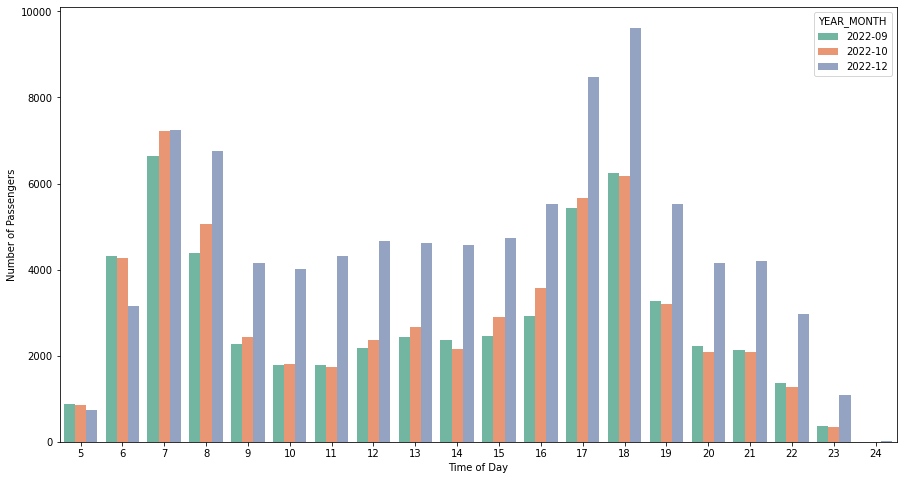

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(data = telusage_group[telusage_group['DAY_TYPE'] == 'WEEKDAY'], 
            x = 'TIME_PER_HOUR', y = 'DAILY_TOTAL_TRIPS', hue = 'YEAR_MONTH', palette='Set2')
plt.xlabel("Time of Day")
plt.ylabel("Number of Passengers")

In [38]:
nslusagep = datasetp[datasetp['DESTINATION_PT_CODE'].str.contains("NS") | datasetp['ORIGIN_PT_CODE'].str.contains("NS")]
nslusagep.head(10)

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
1,2022-12,WEEKENDS/HOLIDAY,11,TRAIN,NS14,DT15,48
2,2022-12,WEEKDAY,11,TRAIN,NS14,DT15,77
3,2022-12,WEEKENDS/HOLIDAY,11,TRAIN,DT15,NS14,7
4,2022-12,WEEKDAY,11,TRAIN,DT15,NS14,4
39,2022-12,WEEKDAY,14,TRAIN,NE10,NS3,3
40,2022-12,WEEKDAY,14,TRAIN,NS3,NE10,7
41,2022-12,WEEKENDS/HOLIDAY,14,TRAIN,NE10,NS3,4
42,2022-12,WEEKENDS/HOLIDAY,14,TRAIN,NS3,NE10,3
64,2022-12,WEEKDAY,14,TRAIN,NS16,DT14,4
65,2022-12,WEEKDAY,14,TRAIN,DT14,NS16,4


In [39]:
def remove_trips_from_NSL_post(origin, dest):
    if origin.find("NS") >= 0 and origin.find("/") >= 0:
        return 0   
    if origin.find("EW24") >= 0 and (dest.find("EW") >= 0 or dest.find("CG") >= 0):
        return 0
    elif origin.find("BP1") >= 0 and dest.find("BP") >= 0:
        return 0
    elif origin.find("TE2") >= 0 and dest.find("TE") >= 0:
        return 0
    elif origin.find("TE14") >= 0 and dest.find("TE") >= 0:
        return 0
    elif origin.find("EW13") >= 0 and (dest.find("EW") >= 0 or dest.find("CG") >= 0):
        return 0
    elif origin.find("EW14") >= 0 and (dest.find("EW") >= 0 or dest.find("CG") >= 0):
        return 0
    
    elif origin.find("CC15") >= 0 and dest.find("CC") >= 0:
        # exceptions for Bishan station
        if dest.find("CC1") >= 0 or dest.find("CC2") >= 0 or dest.find("CC3") >= 0:
            return 1
        else:
            return 0
    
    elif origin.find("NS24") >= 0 and (dest.find("CC") >= 0 or dest.find("NE") >= 0):
        # exception for Dhoby Ghaut Station
        if dest.find("CC15") >= 0 or dest.find("CC16") >= 0 or dest.find("CC17") >= 0:
            return 1
        else:
            return 0
    
    elif origin.find("NS27") >= 0 and (dest.find("CC") >= 0 or dest.find("CE") >= 0  or dest.find("TE") >= 0):
        # exception for Marina Bay Station
        if dest.find("CC15") >= 0:
            return 1
        else:
            return 0
        
    elif dest.find("NS") >= 0 and dest.find("/") >= 0:
        return 0  
    elif dest.find("EW24") >= 0 and (origin.find("EW") >= 0 or origin.find("CG") >= 0):
        return 0
    elif dest.find("BP1") >= 0 and origin.find("BP") >= 0:
        return 0
    elif dest.find("TE2") >= 0 and origin.find("TE") >= 0:
        return 0
    elif dest.find("TE14") >= 0 and origin.find("TE") >= 0:
        return 0
    elif dest.find("EW13") >= 0 and (origin.find("EW") >= 0 or origin.find("CG") >= 0):
        return 0
    elif dest.find("EW14") >= 0 and (origin.find("EW") >= 0 or origin.find("CG") >= 0):
        return 0
    
    elif dest.find("CC15") >= 0 and origin.find("CC") >= 0:
        # exceptions for Bishan station
        if origin.find("CC1") >= 0 or origin.find("CC2") >= 0 or origin.find("CC3") >= 0:
            return 1
        else:
            return 0
    
    elif dest.find("NS24") >= 0 and (origin.find("CC") >= 0 or origin.find("NE") >= 0):
        # exception for Dhoby Ghaut Station
        if origin.find("CC15") >= 0 or origin.find("CC16") >= 0 or origin.find("CC17") >= 0:
            return 1
        else:
            return 0
    
    elif dest.find("NS27") >= 0 and (origin.find("CC") >= 0 or origin.find("CE") >= 0 or origin.find("TE") >= 0):
        # exception for Marina Bay Station
        if origin.find("CC15") >= 0:
            return 1
        else:
            return 0
    
    else:
        return 1

In [40]:
nslusagep['remove'] = nslusagep.apply(lambda x: remove_trips_from_NSL_post(x['ORIGIN_PT_CODE'], x['DESTINATION_PT_CODE']), axis=1)

C:\Users\Bryan\AppData\Local\Temp/ipykernel_17568/3509759772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nslusagep['remove'] = nslusagep.apply(lambda x: remove_trips_from_NSL_post(x['ORIGIN_PT_CODE'], x['DESTINATION_PT_CODE']), axis=1)


In [41]:
nslusagep = nslusagep[nslusagep['remove'] == 1]
nslusagep.drop(['remove'], axis = 1, inplace=True)
nslusagep_group = nslusagep.groupby(['YEAR_MONTH', 'DAY_TYPE', 'TIME_PER_HOUR']).sum()
nslusagep_group = nslusagep_group.reset_index(['YEAR_MONTH', 'DAY_TYPE', 'TIME_PER_HOUR'])
nslusagep_group

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,TOTAL_TRIPS
0,2022-12,WEEKDAY,0,16157
1,2022-12,WEEKDAY,5,257024
2,2022-12,WEEKDAY,6,767082
3,2022-12,WEEKDAY,7,1349363
4,2022-12,WEEKDAY,8,1217635
5,2022-12,WEEKDAY,9,787716
6,2022-12,WEEKDAY,10,703863
7,2022-12,WEEKDAY,11,754517
8,2022-12,WEEKDAY,12,822995
9,2022-12,WEEKDAY,13,833634


In [42]:
# oct_mean_ridershipnsl = nslusage_group.iloc[40:]
# oct_mean_ridershipnsl = oct_mean_ridershipnsl['DAILY_TOTAL_TRIPS'].tolist()
# oct_mean_ridershipnsl

In [43]:
# adjustedRidershipnsl = []
# for counter in range(40):
#     if counter < 20:
#         adjustedRidershipnsl.append(int(oct_mean_ridershipnsl[counter]) * 9)
#     else:
#         adjustedRidershipnsl.append(int(oct_mean_ridershipnsl[counter]) * 3)

In [44]:
# nslusagep_group['TOTAL_TRIPS'] = nslusagep_group['TOTAL_TRIPS'] - adjustedRidershipnsl
# nslusagep_group

In [45]:
nslusagep_group['TIME_PER_HOUR'] = nslusagep_group['TIME_PER_HOUR'].replace([0], [24])
nslusagep_group['DAILY_TOTAL_TRIPS'] = nslusagep_group.apply(lambda x: get_daily_trips_p(x['DAY_TYPE'], x['TOTAL_TRIPS']), axis=1)
nslusagep_group

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,TOTAL_TRIPS,DAILY_TOTAL_TRIPS
0,2022-12,WEEKDAY,24,16157,769.380952
1,2022-12,WEEKDAY,5,257024,12239.238095
2,2022-12,WEEKDAY,6,767082,36527.714286
3,2022-12,WEEKDAY,7,1349363,64255.380952
4,2022-12,WEEKDAY,8,1217635,57982.619048
5,2022-12,WEEKDAY,9,787716,37510.285714
6,2022-12,WEEKDAY,10,703863,33517.285714
7,2022-12,WEEKDAY,11,754517,35929.380952
8,2022-12,WEEKDAY,12,822995,39190.238095
9,2022-12,WEEKDAY,13,833634,39696.857143


In [46]:
nslusage_group = pd.concat([nslusage_group, nslusagep_group])

Text(0, 0.5, 'Number of Passengers')

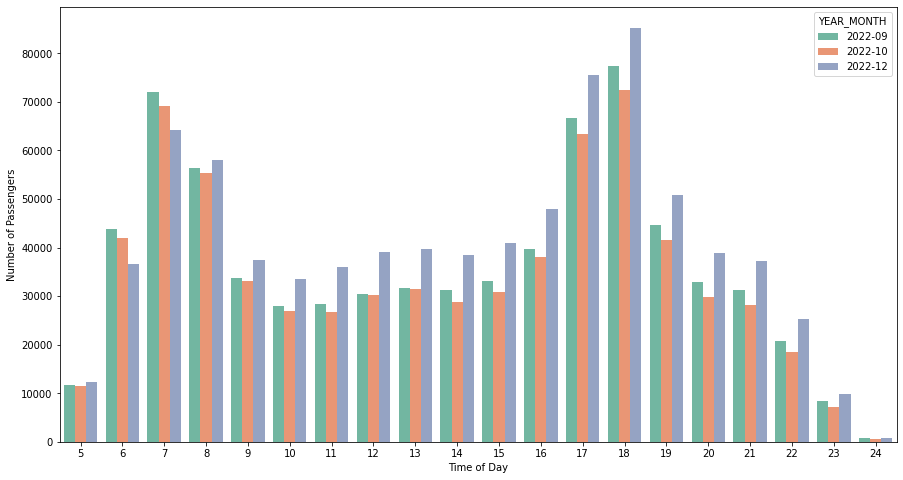

In [47]:
plt.figure(figsize=(15,8))
sns.barplot(data = nslusage_group[nslusage_group['DAY_TYPE'] == 'WEEKDAY'], 
            x = 'TIME_PER_HOUR', y = 'DAILY_TOTAL_TRIPS', hue = 'YEAR_MONTH', palette='Set2')
plt.xlabel("Time of Day")
plt.ylabel("Number of Passengers")

In [48]:
sepTotal = dataset202209.groupby(['DAY_TYPE']).sum()
sepTotal = sepTotal.reset_index()
sepTotal.drop(['TIME_PER_HOUR'], axis=1, inplace=True)
sepTotal['DAILY_TOTAL_TRIPS'] = np.floor(np.where(sepTotal['DAY_TYPE'] == 'WEEKDAY', sepTotal['TOTAL_TRIPS']/22, sepTotal['TOTAL_TRIPS']/9))
sepTotal

,DAY_TYPE,TOTAL_TRIPS,DAILY_TOTAL_TRIPS
0,WEEKDAY,38611396,1755063.0
1,WEEKENDS/HOLIDAY,11538394,1282043.0


In [49]:
octTotal = dataset202210.groupby(['DAY_TYPE']).sum()
octTotal = octTotal.reset_index()
octTotal.drop(['TIME_PER_HOUR'], axis=1, inplace=True)
octTotal['DAILY_TOTAL_TRIPS'] = np.floor(np.where(octTotal['DAY_TYPE'] == 'WEEKDAY', octTotal['TOTAL_TRIPS']/20, octTotal['TOTAL_TRIPS']/11))
octTotal

,DAY_TYPE,TOTAL_TRIPS,DAILY_TOTAL_TRIPS
0,WEEKDAY,33397937,1669896.0
1,WEEKENDS/HOLIDAY,15000444,1363676.0


In [50]:
decTotal = datasetp.groupby(['DAY_TYPE']).sum()
decTotal = decTotal.reset_index()
decTotal.drop(['TIME_PER_HOUR'], axis=1, inplace=True)
decTotal['DAILY_TOTAL_TRIPS'] = np.floor(np.where(decTotal['DAY_TYPE'] == 'WEEKDAY', decTotal['TOTAL_TRIPS']/21, decTotal['TOTAL_TRIPS']/10))
decTotal

,DAY_TYPE,TOTAL_TRIPS,DAILY_TOTAL_TRIPS
0,WEEKDAY,41273375,1965398.0
1,WEEKENDS/HOLIDAY,17123907,1712390.0


### Checkpoint 1

For Weekdays:
Evening rush hour is defined as 1700-2000, 1800-1900 is the peak hour of ridership for the evening commute

| Month | System Wide Daily | % Change | NSL 1800-1900 | % Change | TEL 1800-1900 | % Change |
| ----- | ----------------- | -------- | ------------- | -------- | ------------- | -------- |
| Sep | 1,755,063 | N/A | 77,384 | N/A | 6,245 | NA |
| Oct | 1,669,896 | -5.10% | 72,383 | -6.91% | 6,179 | -1.07% |
| Dec | 1,965,398 | +16.69% | 85,296 | +17.83% | 9,620 | +55.68% |


| Month | System Wide Daily | % Change | NSL 1700-2000 | % Change | TEL 1700-2000 | % Change |
| ----- | ----------------- | -------- | ------------- | -------- | ------------- | -------- |
| Sep | 1,755,063 | N/A | 188,798 | N/A | 14,944 | NA |
| Oct | 1,669,896 | -5.10% | 177,354 | -6.45% | 15,047 | +0.68% |
| Dec | 1,965,398 | +16.69% | 211,804 | +19.42% | 23,634 | +57.06% |

#### Disclaimer 1: NSL and TEL ridership are an approximate of the actual ridership based on passenger origin and destination data
#### Disclaimer 2: Dec data might be overcounted due to repetitive entries in the data

The rise in ridership on the NSL during Dec evening rush hour is in-line with that of the system wide increase. If the TEL3 did not open, a near zero percentage change in Dec TEL ridership was to be expected. The increase is reasonable as more stations have opened and connectivity has increased across the line. 

Without concrete location data, the actual increase in ridership could be attributed to the following factors:
1. Displacement of NSL passengers
2. New passengers residing or travelling to the vicinity of TEL stations
3. Bus passengers on parallel bus services such as 75 (Napier - Outram), 132 (Mayflower - Orchard Boulevard), 162 (Bright Hill - Shenton Way) and 167 (Springleaf - Shenton Way)

Thoughts: The displacement of NSL passengers to TEL is still rather insignificant as compared to the large passenger volume on the NSL itself. More can be done to displace passengers onto the TEL since intervals of 5 mins during peak period can be further shortened. 

### Bus Stops along TEL Further Analysis
Comparison Oct vs Dec across all destination bus stops near TEL 1-3 stations to see the change in demand

In [51]:
telbusstops = pd.read_csv('tel_busstops.csv')
telbusstops = telbusstops.dropna()
telbusstops.stage = telbusstops.stage.astype(int)
telbusstops.code = telbusstops.code.astype(int)
telbusstops

,description,stage,code
0,47201 – Woodlands North Coast Rd (W’lands Nth ...,1,47201
1,47009 - Woodlands Temporary Bus Interchange,1,47009
2,46009 - Woodlands Integrated Transport Hub,1,46009
3,46631 – Woodlands Ave 2 (W’lands Stn Exit 5),1,46631
4,46639 – Woodlands Ave 2 (W’lands Stn Exit 4),1,46639
...,...,...,...
84,03129 – Shenton Way (UIC Bldg),3,3129
85,03391 – Marina Blvd (Marina Bay Financial Ctr),3,3391
86,03539 – Central Blvd (Marina Bay Stn),3,3539
87,03369 – Marina Gardens Dr (Gardens by the Bay ...,3,3369


In [52]:
postbusstops = telbusstops.code.tolist()
prebusstops = telbusstops[telbusstops['stage'] != 3]
prebusstops = prebusstops.code.tolist()

In [53]:
bus202210 = pd.read_csv('origin_destination_bus_202210.csv')
bus202210

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2022-10,WEEKDAY,10,BUS,65239,65159,2
1,2022-10,WEEKENDS/HOLIDAY,10,BUS,65239,65159,1
2,2022-10,WEEKENDS/HOLIDAY,7,BUS,23519,23311,2
3,2022-10,WEEKDAY,11,BUS,52509,42041,1
4,2022-10,WEEKENDS/HOLIDAY,16,BUS,54349,53241,1
...,...,...,...,...,...,...,...
5122920,2022-10,WEEKDAY,11,BUS,56201,54241,10
5122921,2022-10,WEEKENDS/HOLIDAY,16,BUS,81089,80279,5
5122922,2022-10,WEEKDAY,16,BUS,81089,80279,12
5122923,2022-10,WEEKDAY,17,BUS,67289,67301,19


In [54]:
bus202212 = pd.read_csv('origin_destination_bus_202212.csv')
bus202212

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2022-12,WEEKENDS/HOLIDAY,16,BUS,4168,10051,2
1,2022-12,WEEKDAY,16,BUS,4168,10051,5
2,2022-12,WEEKENDS/HOLIDAY,14,BUS,80119,90079,2
3,2022-12,WEEKDAY,14,BUS,80119,90079,6
4,2022-12,WEEKDAY,17,BUS,44069,17229,6
...,...,...,...,...,...,...,...
4968372,2022-12,WEEKENDS/HOLIDAY,20,BUS,80029,44469,1
4968373,2022-12,WEEKDAY,20,BUS,80029,44469,2
4968374,2022-12,WEEKENDS/HOLIDAY,20,BUS,11369,16041,2
4968375,2022-12,WEEKDAY,20,BUS,11369,16041,1


In [55]:
def keep_TEL_busstops(origin, dest, array):
    if dest in array:
        return 1
    else:
        return 0

In [56]:
bus202210['remove'] = bus202210.apply(lambda x: keep_TEL_busstops(x['ORIGIN_PT_CODE'], x['DESTINATION_PT_CODE'], postbusstops), axis=1)
bus202210 = bus202210[bus202210['remove'] == 1]

In [57]:
bus202210

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS,remove
21,2022-10,WEEKDAY,11,BUS,65019,5269,1,1
22,2022-10,WEEKENDS/HOLIDAY,11,BUS,65019,5269,1,1
136,2022-10,WEEKDAY,8,BUS,8041,13199,5,1
137,2022-10,WEEKENDS/HOLIDAY,8,BUS,8041,13199,3,1
186,2022-10,WEEKDAY,11,BUS,53221,54191,4,1
...,...,...,...,...,...,...,...,...
5122306,2022-10,WEEKENDS/HOLIDAY,18,BUS,53381,53351,61,1
5122379,2022-10,WEEKDAY,11,BUS,16209,9023,2,1
5122392,2022-10,WEEKDAY,23,BUS,55109,55019,2,1
5122494,2022-10,WEEKENDS/HOLIDAY,22,BUS,8011,9131,1,1


In [58]:
bus202212['remove'] = bus202212.apply(lambda x: keep_TEL_busstops(x['ORIGIN_PT_CODE'], x['DESTINATION_PT_CODE'], postbusstops), axis=1)
bus202212 = bus202212[bus202212['remove'] == 1]

In [59]:
bus202212

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS,remove
30,2022-12,WEEKENDS/HOLIDAY,18,BUS,55171,54199,3,1
41,2022-12,WEEKDAY,10,BUS,3111,9022,1,1
85,2022-12,WEEKDAY,22,BUS,46399,46009,107,1
86,2022-12,WEEKENDS/HOLIDAY,22,BUS,46399,46009,67,1
150,2022-12,WEEKDAY,11,BUS,82049,40081,1,1
...,...,...,...,...,...,...,...,...
4968302,2022-12,WEEKDAY,15,BUS,44289,9047,37,1
4968341,2022-12,WEEKENDS/HOLIDAY,17,BUS,49171,47009,20,1
4968342,2022-12,WEEKDAY,17,BUS,49171,47009,44,1
4968358,2022-12,WEEKDAY,10,BUS,48021,56099,18,1


In [60]:
octbusTotal = bus202210.groupby(['YEAR_MONTH', 'DAY_TYPE', 'TIME_PER_HOUR', 'DESTINATION_PT_CODE']).sum()
octbusTotal = octbusTotal.reset_index()
octbusTotal = octbusTotal.drop(['ORIGIN_PT_CODE', 'remove'], axis=1)
octbusTotal['TIME_PER_HOUR'] = octbusTotal['TIME_PER_HOUR'].replace([0], [24])
octbusTotal

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2022-10,WEEKDAY,24,3129,60
1,2022-10,WEEKDAY,24,3391,1
2,2022-10,WEEKDAY,24,3539,3
3,2022-10,WEEKDAY,24,5012,25
4,2022-10,WEEKDAY,24,5019,64
...,...,...,...,...,...
3349,2022-10,WEEKENDS/HOLIDAY,23,55019,97
3350,2022-10,WEEKENDS/HOLIDAY,23,55021,44
3351,2022-10,WEEKENDS/HOLIDAY,23,55029,63
3352,2022-10,WEEKENDS/HOLIDAY,23,56091,56


In [61]:
decbusTotal = bus202212.groupby(['YEAR_MONTH', 'DAY_TYPE', 'TIME_PER_HOUR', 'DESTINATION_PT_CODE']).sum()
decbusTotal = decbusTotal.reset_index()
decbusTotal = decbusTotal.drop(['ORIGIN_PT_CODE', 'remove'], axis=1)
decbusTotal['TIME_PER_HOUR'] = decbusTotal['TIME_PER_HOUR'].replace([0], [24])
decbusTotal

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2022-12,WEEKDAY,24,3129,52
1,2022-12,WEEKDAY,24,3539,2
2,2022-12,WEEKDAY,24,3549,2
3,2022-12,WEEKDAY,24,5012,27
4,2022-12,WEEKDAY,24,5019,46
...,...,...,...,...,...
3404,2022-12,WEEKENDS/HOLIDAY,23,55019,76
3405,2022-12,WEEKENDS/HOLIDAY,23,55021,33
3406,2022-12,WEEKENDS/HOLIDAY,23,55029,44
3407,2022-12,WEEKENDS/HOLIDAY,23,56091,56


Text(0, 0.5, 'Number of Passengers')

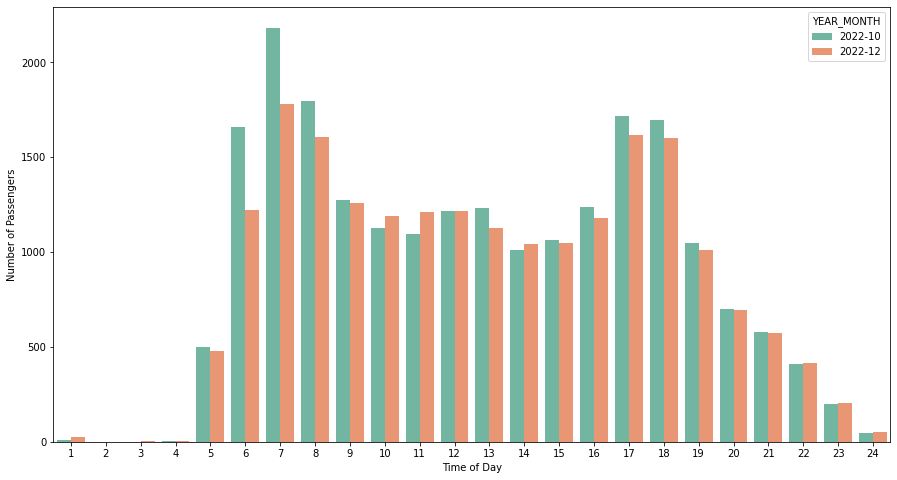

In [62]:
bustotal = pd.concat([octbusTotal, decbusTotal])
plt.figure(figsize=(15,8))
sns.barplot(data = bustotal[bustotal['DAY_TYPE'] == 'WEEKDAY'], 
            x = 'TIME_PER_HOUR', y = 'TOTAL_TRIPS', hue = 'YEAR_MONTH', palette='Set2', ci=None)
plt.xlabel("Time of Day")
plt.ylabel("Number of Passengers")

### Checkpoint 2

#### Disclaimer: This is an approximate of the number of passengers that would take the TEL, since not all commuters alighting at these bus stops would have taken the TEL.

As mentioned in checkpoint 1, more passengers could be displaced onto the TEL especially during peak periods. Upon further analysis of bus trip data, it can be seen that bus trips to the TEL stations has decreased for December as compared to October especially during peak periods. 


Thoughts: While part of the decrease could be attributed to the school holidays, perhaps more could be done to encourage commuters to use the TEL. One way might be to re-route more services towards these TEL bus stops and/or divert buses away from NSL station bus stops




#### Credits: 
Data is retrieved from LTA DataMall 